# Classification - Rain in Australia


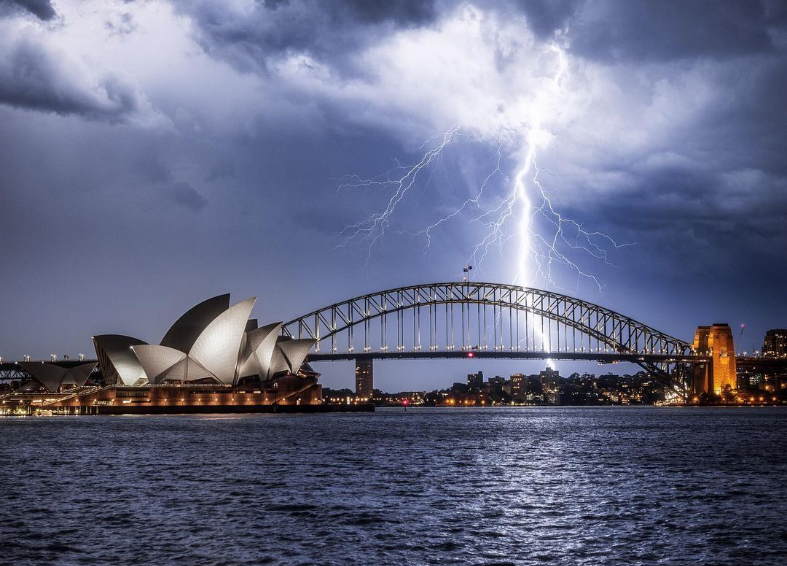

In this notebook, we will work with a dataset that collects weather data in Australia. We will perform an exploratory data analysis, followed by data preprocessing to build predictive models that forecast whether it will rain or not the next day.

Data Source: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?resource=download


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [4]:
aus_raw = pd.read_csv('weatherAUS.csv')

In [5]:
aus_raw

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140580,2012-08-08,Darwin,17.8,31.4,0.0,7.0,11.1,E,48.0,E,...,57.0,15.0,1017.3,1013.0,1.0,0.0,23.7,30.7,No,No
140581,2012-08-09,Darwin,18.4,32.2,0.0,7.4,11.1,E,35.0,E,...,66.0,42.0,1017.4,1012.5,0.0,1.0,24.2,29.4,No,No
140582,2012-08-10,Darwin,17.3,32.8,0.0,7.6,10.9,E,52.0,E,...,74.0,17.0,1017.9,1012.9,0.0,0.0,24.1,32.0,No,No
140583,2012-08-11,Darwin,17.7,31.6,0.0,7.4,11.1,ESE,48.0,SE,...,42.0,10.0,1018.5,1013.7,0.0,0.0,21.7,30.4,No,No


Let's check the datatype for each column:

In [6]:
aus_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140585 entries, 0 to 140584
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140585 non-null  object 
 1   Location       140584 non-null  object 
 2   MinTemp        139184 non-null  float64
 3   MaxTemp        139371 non-null  float64
 4   Rainfall       137397 non-null  float64
 5   Evaporation    79490 non-null   float64
 6   Sunshine       73907 non-null   float64
 7   WindGustDir    130377 non-null  object 
 8   WindGustSpeed  130436 non-null  float64
 9   WindDir9am     130137 non-null  object 
 10  WindDir3pm     136409 non-null  object 
 11  WindSpeed9am   138855 non-null  float64
 12  WindSpeed3pm   137559 non-null  float64
 13  Humidity9am    138026 non-null  float64
 14  Humidity3pm    136918 non-null  float64
 15  Pressure9am    125530 non-null  float64
 16  Pressure3pm    125566 non-null  float64
 17  Cloud9am       85968 non-null

Since our target feature is 'RainTomorrow', let's remove all the NaN values

In [7]:
aus_raw.dropna(subset=['RainTomorrow'], inplace=True)

<ipython-input-8-c5bba81559f3>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  hist_loc.set_xticklabels(hist_loc.get_xticklabels(), rotation=90);


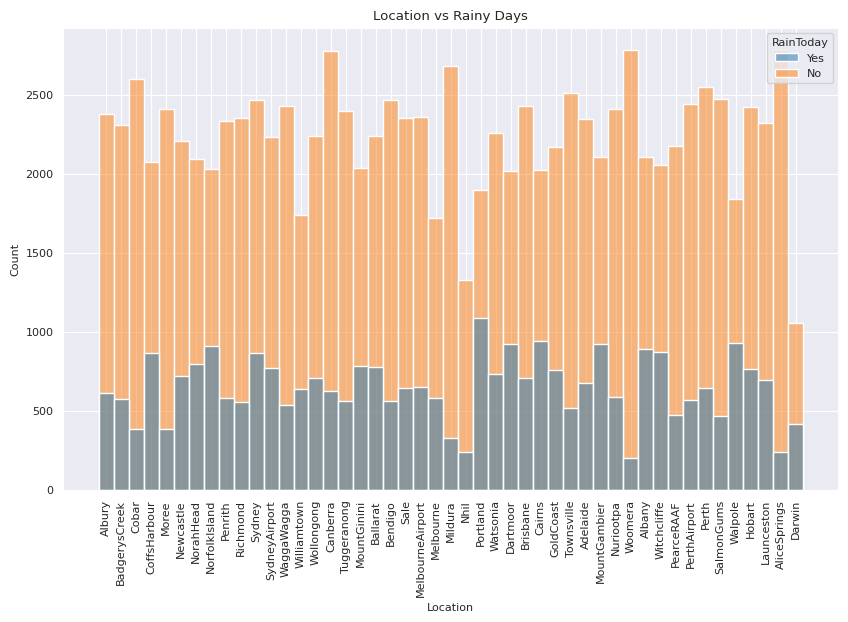

In [8]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 8
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'
plt.title('Location vs Rainy Days')


hist_loc = sns.histplot(data=aus_raw, x='Location', hue='RainToday', hue_order=['Yes', 'No'])
hist_loc.set_xticklabels(hist_loc.get_xticklabels(), rotation=90);

In the graph above we can observe how all regions have approximately a similar percentage of rainy days.

<Axes: title={'center': 'Rain Today vs Rain Tomorrow'}, xlabel='RainTomorrow', ylabel='Count'>

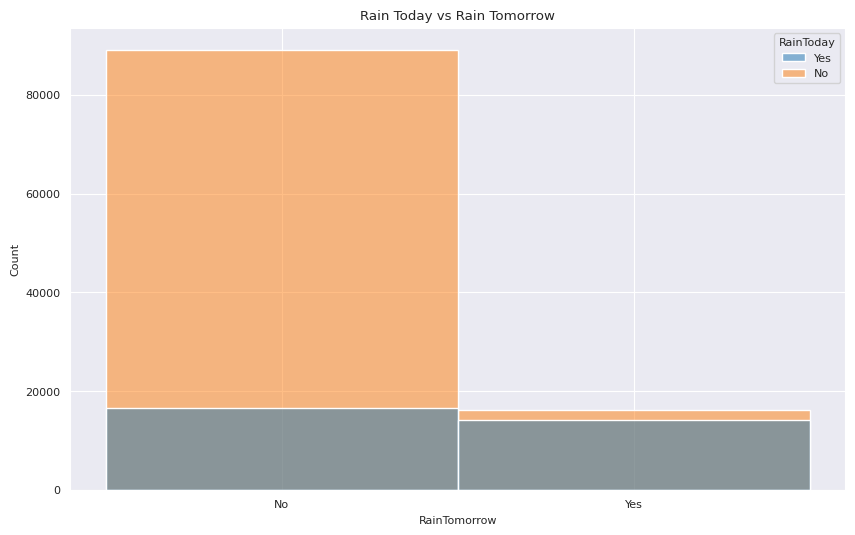

In [28]:
plt.title('Rain Today vs Rain Tomorrow')

sns.histplot(data=aus_raw ,x='RainTomorrow', hue='RainToday', hue_order=['Yes', 'No'])

<Axes: title={'center': 'Rain Today vs Rain Tomorrow'}, xlabel='Temp3pm', ylabel='Count'>

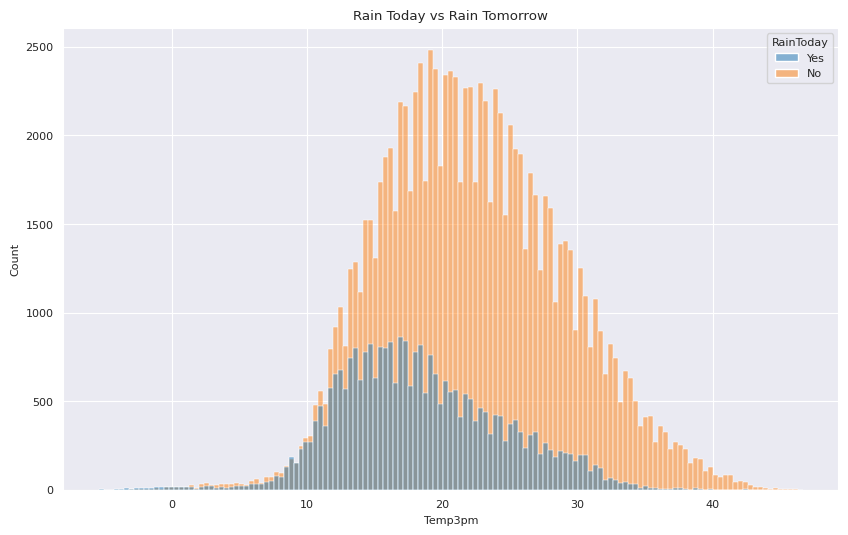

In [10]:
plt.title('Rain Today vs Rain Tomorrow')

sns.histplot(data=aus_raw ,x='Temp3pm', hue='RainToday', hue_order=['Yes', 'No'])

 It can be observed in the above graph that if temperatures were lower at 3 pm, there is a higher chance of rain the following day.

<Axes: title={'center': 'Min Temp. vs Max Temp.'}, xlabel='MinTemp', ylabel='MaxTemp'>

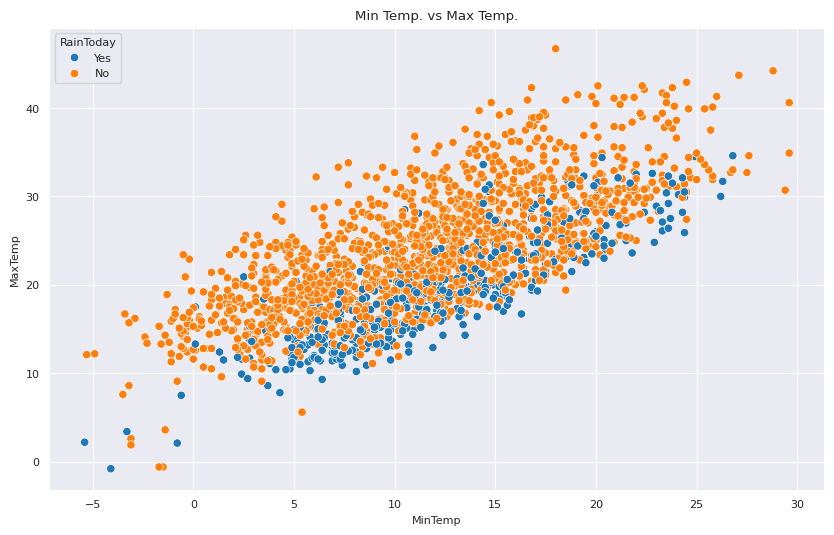

In [11]:
plt.title('Min Temp. vs Max Temp.')

sns.scatterplot(data=aus_raw.sample(2000), x='MinTemp', y='MaxTemp', hue='RainToday', hue_order=['Yes', 'No'])

It can be observed in the above graph how when the relationship between the minimum temperature and the maximum temperature is smaller, the chances of rain the following day increase.

<Axes: title={'center': 'Temp3pm vs Humidity3pm'}, xlabel='Temp3pm', ylabel='Humidity3pm'>

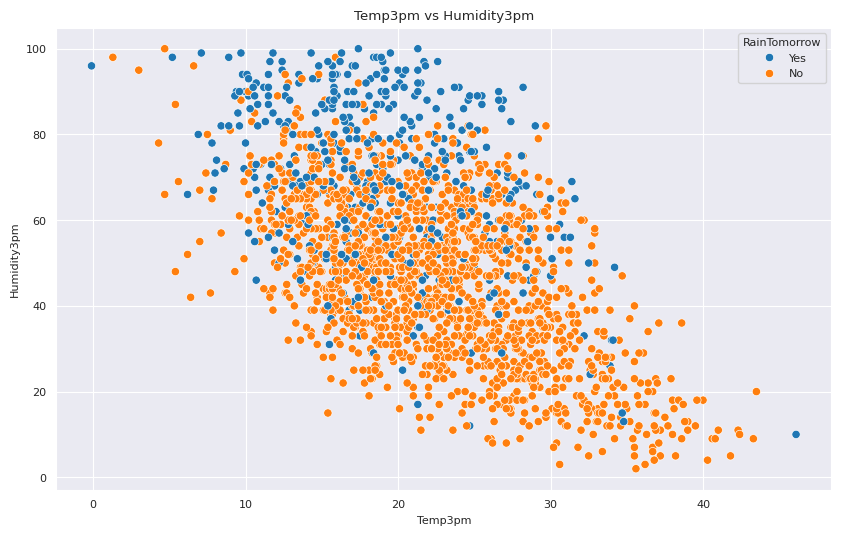

In [12]:
plt.title('Temp3pm vs Humidity3pm')

sns.scatterplot(data=aus_raw.sample(2000), x='Temp3pm', y='Humidity3pm', hue='RainTomorrow', hue_order=['Yes', 'No'])


Observing the graph above, it can be noted that when the humidity-temperature relationship is higher, there are more possibilities of rain the following day.

<Axes: title={'center': 'Temp 3pm vs Pressure 3pm'}, xlabel='Temp3pm', ylabel='Pressure3pm'>

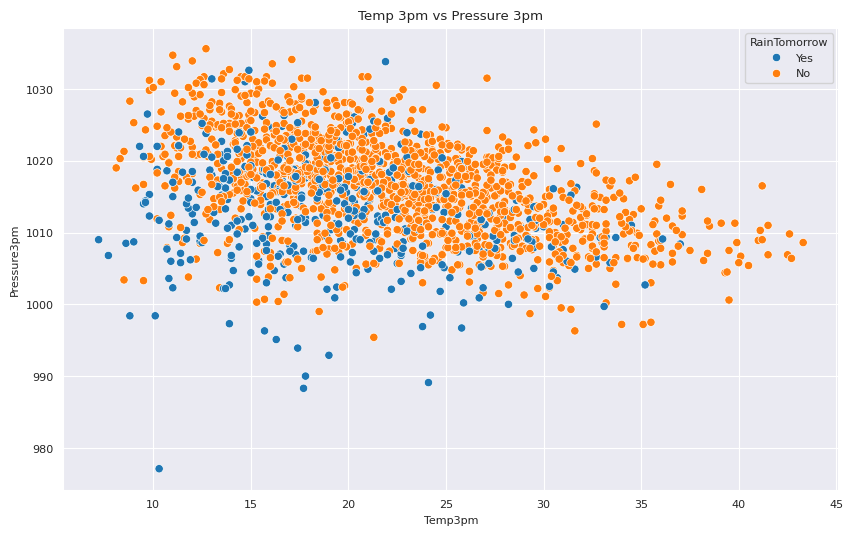

In [13]:
plt.title('Temp 3pm vs Pressure 3pm')

sns.scatterplot(data=aus_raw.sample(2000), x='Temp3pm', y='Pressure3pm', hue='RainTomorrow', hue_order=['Yes', 'No'])

## Data Preprocessing:

First of all, it is importante to separate the data set into train, validation and test set:


Separating the dataset into training, testing, and validation sets serves to:

Training set: Train the model on a portion of the data to learn patterns.

Validation set: Fine-tune model hyperparameters to optimize performance without overfitting to the testing set.

Testing set: Evaluate the model's performance on unseen data to assess generalization.



In [29]:
from sklearn.model_selection import train_test_split

In [15]:
train_val_df, test_df = train_test_split(aus_raw, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

After separating the dataset, it is necessary to identify and separate the inputs and the target.

The inputs are those columns of the dataset that we will use to make predictions, while the target is precisely the column that we want to predict

In [16]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'
train_inputs, train_targets = train_df[input_cols].copy(), train_df[target_col].copy()
val_inputs, val_targets = val_df[input_cols].copy(), val_df[target_col].copy()
test_inputs, test_targets = test_df[input_cols].copy(), test_df[target_col].copy()

Now it is necessary to identify numerical and categorical columns.

Numerical columns require scaling and can be directly fed into many algorithms. Categorical columns need encoding to convert them into numerical values. Separating them allows for specific preprocessing tailored to each data type, improving model performance.

In the following lines, scaling, encoding, and imputation will be performed to improve the model's performance.

In [17]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [18]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean').fit(aus_raw[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(aus_raw[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [20]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(aus_raw[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
<ipython-input-20-b671ea50aa8d>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
<ipython-input-20-b671ea50aa8d>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_co

## Model Training and Evaluation

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [22]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [23]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

In [24]:
train_preds = model.predict(X_train)
train_probs = model.predict_proba(X_train)
accuracy_score(train_targets, train_preds)

0.8482095201125722

In [25]:
from sklearn.metrics import confusion_matrix

def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return preds

Accuracy: 84.44%
Accuracy: 84.38%


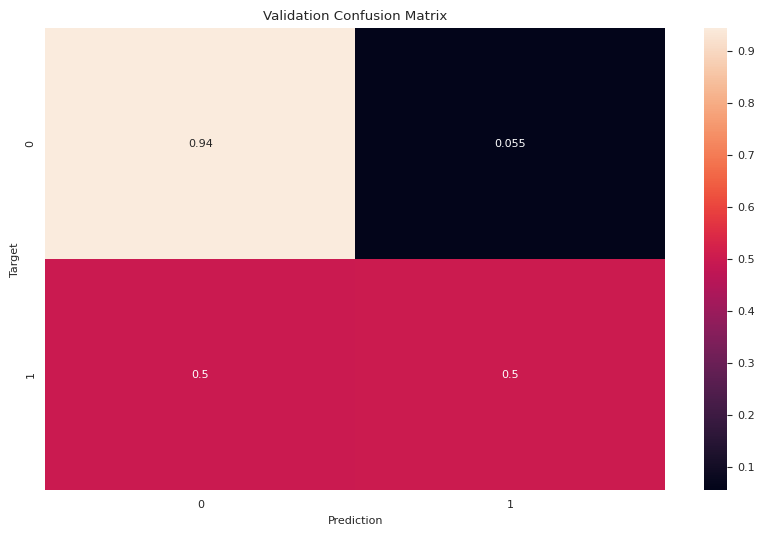

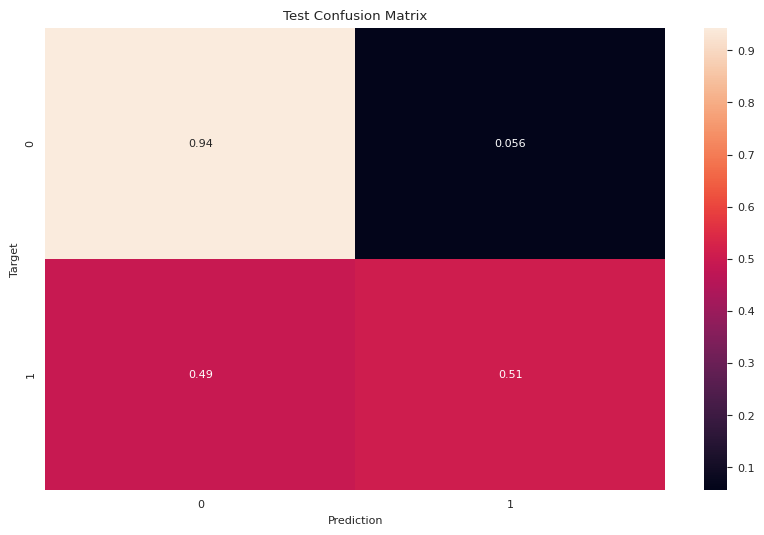

In [26]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')
test_preds = predict_and_plot(X_test, test_targets, 'Test')

Is 84% accuracy actually good?

Let's compare it with 2 random of 'dumb' models. One randomly peaks 'Yes' or 'No' and the other always predicts 'No'.

In [30]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

In [36]:
print('Random guess accuracy: %', accuracy_score(test_targets, random_guess(X_test))*100)

Random guess accuracy: % 50.24200298409694


In [37]:
def all_no(inputs):
    return np.full(len(inputs), "No")

print(' "Always No" accuracy: %', accuracy_score(test_targets, all_no(X_test))*100)

 "Always No" accuracy: % 77.03701008042505


As we can see, the logistic regression model is widely better than the 2 random models.

## Conclusions:

It was possible to obtain a logistic regression model that achieves predictions with an 84% accuray but with a high porcentage of false negatives.